In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn에서 제공하는 그래프테마
# sns.set_style("ticks")
sns.set_style("darkgrid")
# sns.set_style("whitegrid")

# 그래프를 그리기 위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'Apple Gothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 16, 8

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 '-'기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

### 각 팀별 승률을 확인한다.

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('data2/baseball2.csv')
df1

,경기날짜,팀1 이름,팀2 이름,팀1 점수,팀2 점수,팀1 투수,팀2 투수
0,20080329,롯데,한화,11,1,NaN,NaN
1,20080329,LG,SK,4,5,NaN,NaN
2,20080329,KIA,삼성,3,4,NaN,NaN
3,20080329,롯데,한화,11,1,NaN,NaN
4,20080329,LG,SK,4,5,NaN,NaN
...,...,...,...,...,...,...,...
8744,20201118,두산,NC,5,4,플렉센,구창모
8745,20201120,NC,두산,6,7,임정호,박치국
8746,20201121,NC,두산,3,0,송명기,김민규
8747,20201123,두산,NC,0,5,플렉센,구창모


In [3]:
# 필요한 데이터만 가져온다.
df2= df1[['경기날짜', '팀1 이름', '팀2 이름', '팀1 점수', '팀2 점수']]
df2

,경기날짜,팀1 이름,팀2 이름,팀1 점수,팀2 점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080329,롯데,한화,11,1
4,20080329,LG,SK,4,5
...,...,...,...,...,...
8744,20201118,두산,NC,5,4
8745,20201120,NC,두산,6,7
8746,20201121,NC,두산,3,0
8747,20201123,두산,NC,0,5


In [5]:
# 데이터 프레임을 복제한다.
df3 = df2.copy()
df3

,경기날짜,팀1 이름,팀2 이름,팀1 점수,팀2 점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080329,롯데,한화,11,1
4,20080329,LG,SK,4,5
...,...,...,...,...,...
8744,20201118,두산,NC,5,4
8745,20201120,NC,두산,6,7
8746,20201121,NC,두산,3,0
8747,20201123,두산,NC,0,5


In [6]:
# 복제한 데이터 프레임의 이름을 변경
df3.columns = ['경기날짜', '팀2 이름', '팀1 이름', '팀2 점수', '팀1 점수']
df3

,경기날짜,팀2 이름,팀1 이름,팀2 점수,팀1 점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080329,롯데,한화,11,1
4,20080329,LG,SK,4,5
...,...,...,...,...,...
8744,20201118,두산,NC,5,4
8745,20201120,NC,두산,6,7
8746,20201121,NC,두산,3,0
8747,20201123,두산,NC,0,5


In [8]:
# 두 데이터 프레임을 합친다.
df4 = pd.concat([df2, df3])

# index를 리셋한다. 기존의 index 제거
df4.reset_index(inplace=True, drop = True)
df4

,경기날짜,팀1 이름,팀2 이름,팀1 점수,팀2 점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080329,롯데,한화,11,1
4,20080329,LG,SK,4,5
...,...,...,...,...,...
17493,20201118,NC,두산,4,5
17494,20201120,두산,NC,7,6
17495,20201121,두산,NC,0,3
17496,20201123,NC,두산,5,0


In [9]:
# 내가 query문을 쓰고 싶다면 컬럼 이름에 띄어쓰기가 없어야한다.
# 지금은 컬럼이름에 띄어쓰기가 있으므로 컬럼이름을 변경한다.
df4.columns = ['play_date', 'team1', 'team2', 'score1', 'score2']
df4

,play_date,team1,team2,score1,score2
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080329,롯데,한화,11,1
4,20080329,LG,SK,4,5
...,...,...,...,...,...
17493,20201118,NC,두산,4,5
17494,20201120,두산,NC,7,6
17495,20201121,두산,NC,0,3
17496,20201123,NC,두산,5,0


In [10]:
# 경기 결과글 담을 컬럼을 추가한다.
df4['result'] = 0
df4

,play_date,team1,team2,score1,score2,result
0,20080329,롯데,한화,11,1,0
1,20080329,LG,SK,4,5,0
2,20080329,KIA,삼성,3,4,0
3,20080329,롯데,한화,11,1,0
4,20080329,LG,SK,4,5,0
...,...,...,...,...,...,...
17493,20201118,NC,두산,4,5,0
17494,20201120,두산,NC,7,6,0
17495,20201121,두산,NC,0,3,0
17496,20201123,NC,두산,5,0,0


In [11]:
# 승리한 경기의 인덱스를 가져온다.
win_idx = df4.query('score1 > score2').index
win_idx

Int64Index([    0,     3,     6,     9,    11,    13,    14,    18,    19,
               22,
            ...
            17482, 17483, 17484, 17485, 17486, 17491, 17492, 17494, 17496,
            17497],
           dtype='int64', length=8543)

In [12]:
# 승리한 팀의 결과를 1로 채워준다.
df4.loc[win_idx, 'result'] = 1
df4['result'].value_counts()

0    8955
1    8543
Name: result, dtype: int64

In [13]:
# 팀 이름 확인
df4['team1'].value_counts()

두산     1970
SK     1935
삼성     1917
LG     1904
롯데     1902
KIA    1889
한화     1879
NC     1238
넥센     1194
키움      725
kt      486
KT      439
나눔        7
드림        7
이스턴       3
웨스턴       3
Name: team1, dtype: int64

In [14]:
df4['team2'].value_counts()

두산     1970
SK     1935
삼성     1917
LG     1904
롯데     1902
KIA    1889
한화     1879
NC     1238
넥센     1194
키움      725
kt      486
KT      439
나눔        7
드림        7
이스턴       3
웨스턴       3
Name: team2, dtype: int64

In [19]:
# 올스타전 경기는 제거한다.
idx1 = df4.query('team1 == "나눔"').index
df4.drop(idx1, inplace=True)

idx1 = df4.query('team1 == "드림"').index
df4.drop(idx1, inplace=True)

idx1 = df4.query('team1 == "이스턴"').index
df4.drop(idx1, inplace=True)

idx1 = df4.query('team1 == "웨스턴"').index
df4.drop(idx1, inplace=True)

display(df4['team1'].value_counts())
display(df4['team2'].value_counts())

두산     1970
SK     1935
삼성     1917
LG     1904
롯데     1902
KIA    1889
한화     1879
NC     1238
넥센     1194
키움      725
kt      486
KT      439
Name: team1, dtype: int64

두산     1970
SK     1935
삼성     1917
LG     1904
롯데     1902
KIA    1889
한화     1879
NC     1238
넥센     1194
키움      725
kt      486
KT      439
Name: team2, dtype: int64

In [22]:
# NC와 넥센, kt와 KT는 각각 같은 팀을 의미한다. 하나로 합쳐주자.
# 소문자 kt를 대문자 KT로 변경한다.
idx = df4.query('team1 == "kt"').index
df4.loc[idx, 'team1'] = 'KT'

idx = df4.query('team2 == "kt"').index
df4.loc[idx, 'team2'] = 'KT'

display(df4['team1'].value_counts())
display(df4['team2'].value_counts())

두산     1970
SK     1935
삼성     1917
LG     1904
롯데     1902
KIA    1889
한화     1879
NC     1238
넥센     1194
KT      925
키움      725
Name: team1, dtype: int64

두산     1970
SK     1935
삼성     1917
LG     1904
롯데     1902
KIA    1889
한화     1879
NC     1238
넥센     1194
KT      925
키움      725
Name: team2, dtype: int64

In [24]:
# 넥센은 키움으로 변경되었기 때문에 합쳐준다.
# 넥센과 키움의 팀이름을 넥센_키움으로 변경한다.
idx = df4.query('team1 == "키움"').index
df4.loc[idx, 'team1'] = '넥센_키움'

idx = df4.query('team1 == "넥센"').index
df4.loc[idx, 'team1'] = '넥센_키움'

idx = df4.query('team2 == "키움"').index
df4.loc[idx, 'team2'] = '넥센_키움'

idx = df4.query('team2 == "넥센"').index
df4.loc[idx, 'team2'] = '넥센_키움'

display(df4['team1'].value_counts())
display(df4['team2'].value_counts())

두산       1970
SK       1935
넥센_키움    1919
삼성       1917
LG       1904
롯데       1902
KIA      1889
한화       1879
NC       1238
KT        925
Name: team1, dtype: int64

두산       1970
SK       1935
넥센_키움    1919
삼성       1917
LG       1904
롯데       1902
KIA      1889
한화       1879
NC       1238
KT        925
Name: team2, dtype: int64

In [25]:
# 팀별 치룬 경기 횟수를 구한다.
team_count = df4.groupby('team1')['result'].count()
team_count

team1
KIA      1889
KT        925
LG       1904
NC       1238
SK       1935
넥센_키움    1919
두산       1970
롯데       1902
삼성       1917
한화       1879
Name: result, dtype: int64

In [26]:
# 팀별로 승리한 횟수를 가져온다.
team_win_count = df4.groupby('team1')['result'].sum()
team_win_count

team1
KIA       915
KT        397
LG        891
NC        633
SK       1011
넥센_키움     948
두산       1084
롯데        909
삼성        974
한화        773
Name: result, dtype: int64

In [29]:
# 승률을 구한다.
team_win_rate = team_win_count / team_count * 100
team_win_rate = team_win_rate.astype('int')
team_win_rate = team_win_rate.sort_values(ascending = False)
team_win_rate

team1
두산       55
SK       52
NC       51
삼성       50
넥센_키움    49
KIA      48
롯데       47
LG       46
KT       42
한화       41
Name: result, dtype: int32

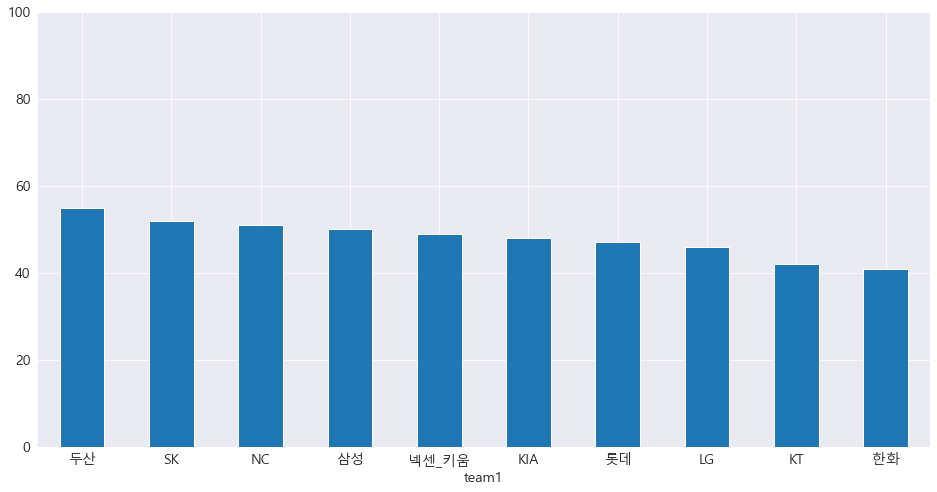

In [47]:
# 승률을 시각화한다.
team_win_rate.plot.bar(rot = 0)
plt.ylim(0,100)
plt.show()

### 특정 팀에 관련된 정보를 확인한다.


In [35]:
df4

,play_date,team1,team2,score1,score2,result
0,20080329,롯데,한화,11,1,1
1,20080329,LG,SK,4,5,0
2,20080329,KIA,삼성,3,4,0
3,20080329,롯데,한화,11,1,1
4,20080329,LG,SK,4,5,0
...,...,...,...,...,...,...
17493,20201118,NC,두산,4,5,0
17494,20201120,두산,NC,7,6,1
17495,20201121,두산,NC,0,3,0
17496,20201123,NC,두산,5,0,1


In [37]:
# 필요한 것만 가져온다.
df5 = df4[['play_date', 'team1', 'team2', 'result']]
df5

,play_date,team1,team2,result
0,20080329,롯데,한화,1
1,20080329,LG,SK,0
2,20080329,KIA,삼성,0
3,20080329,롯데,한화,1
4,20080329,LG,SK,0
...,...,...,...,...
17493,20201118,NC,두산,0
17494,20201120,두산,NC,1
17495,20201121,두산,NC,0
17496,20201123,NC,두산,1


In [38]:
# 경기날짜를 확인
df5['play_date'].dtype

dtype('int64')

In [39]:
# 경기날짜가 정수이기 때문에 10000으로 나눠서 연도를 가져온다.
df5['play_year'] = df5['play_date'] // 10000# 
df5

<ipython-input-39-100cc4494080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['play_year'] = df5['play_date'] // 10000


,play_date,team1,team2,result,play_year
0,20080329,롯데,한화,1,2008
1,20080329,LG,SK,0,2008
2,20080329,KIA,삼성,0,2008
3,20080329,롯데,한화,1,2008
4,20080329,LG,SK,0,2008
...,...,...,...,...,...
17493,20201118,NC,두산,0,2020
17494,20201120,두산,NC,1,2020
17495,20201121,두산,NC,0,2020
17496,20201123,NC,두산,1,2020


In [40]:
# 팀 이름들을 가져온다.
team_list = df5['team1'].value_counts().index
display(team_list)

Index(['두산', 'SK', '넥센_키움', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT'], dtype='object')

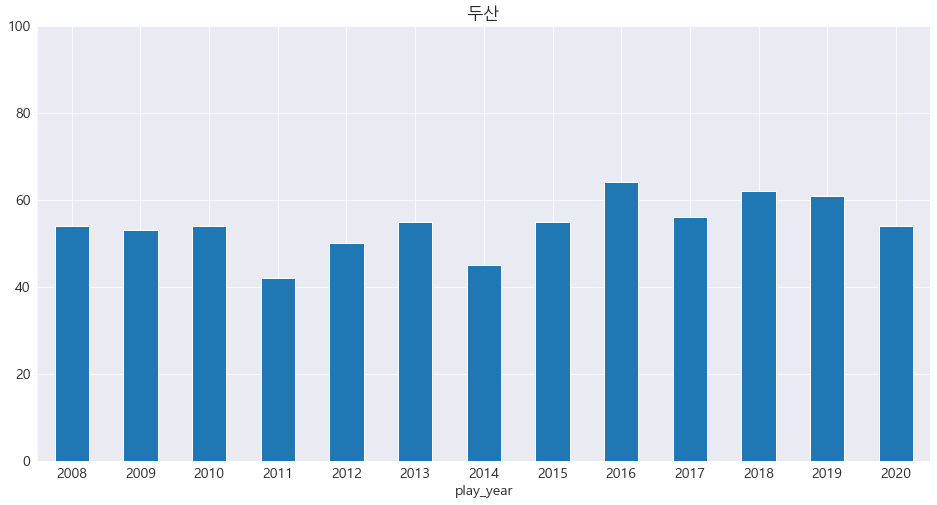

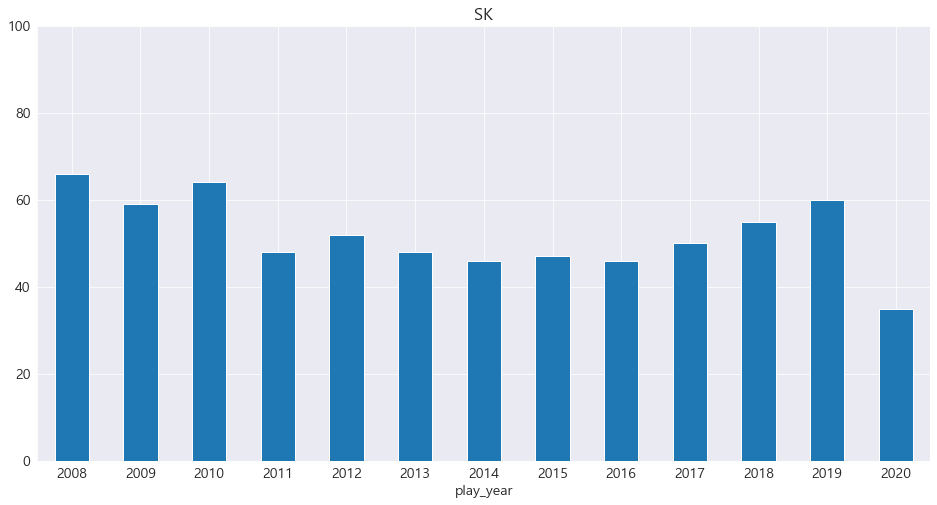

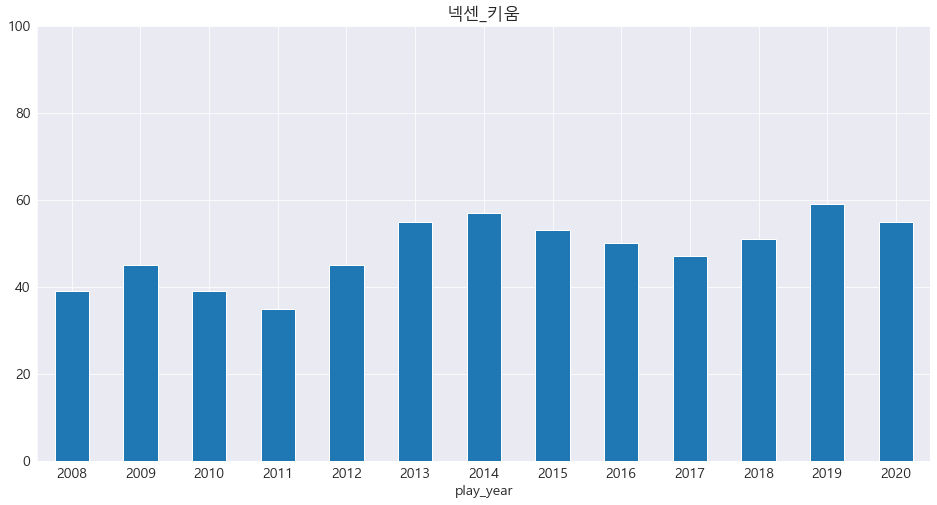

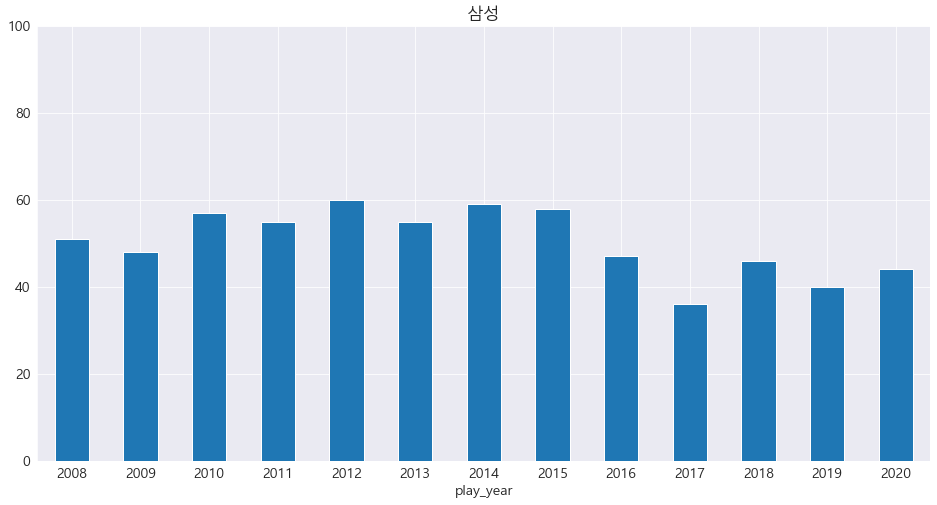

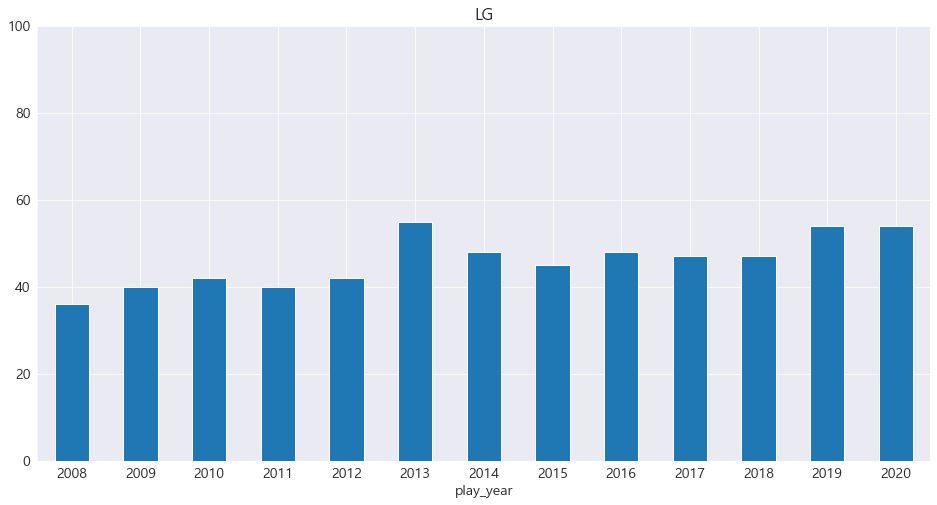

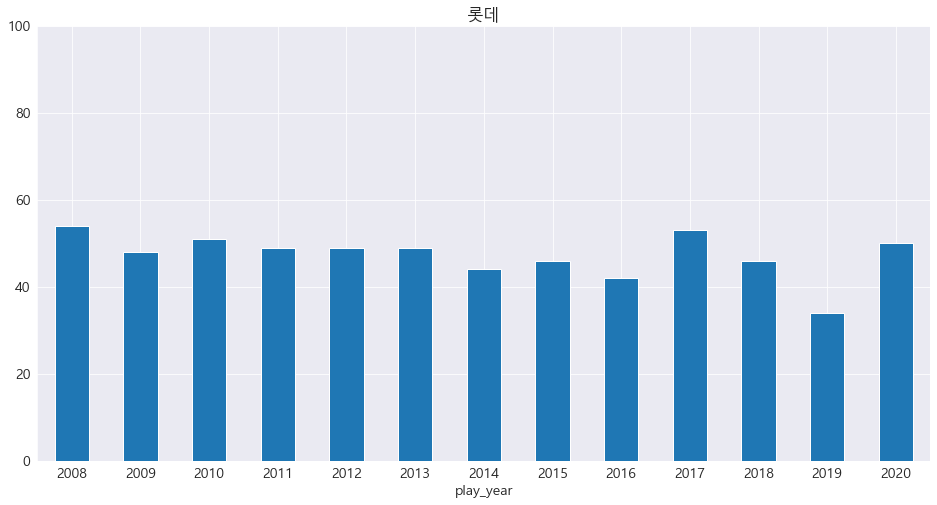

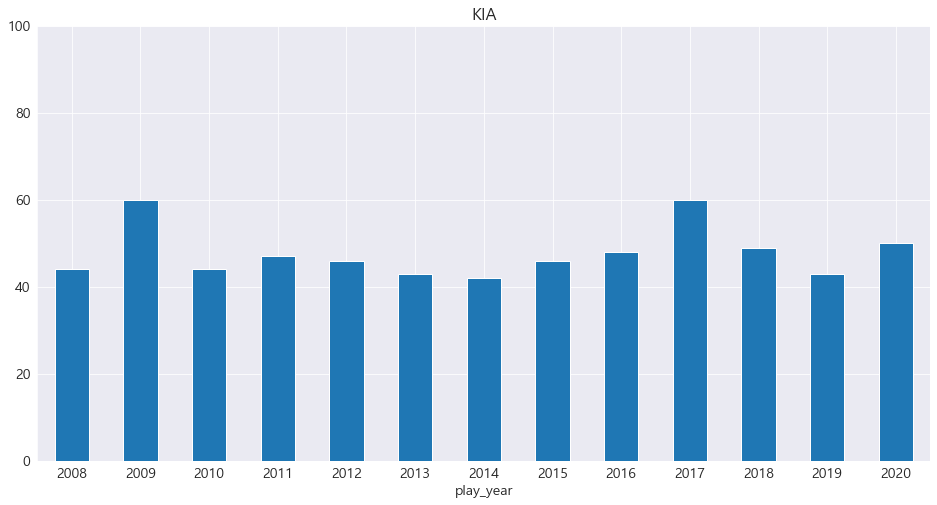

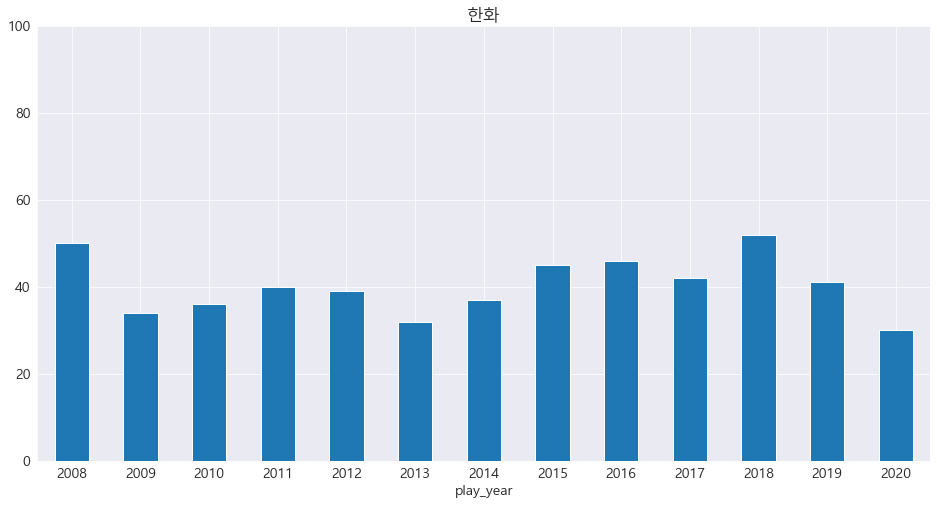

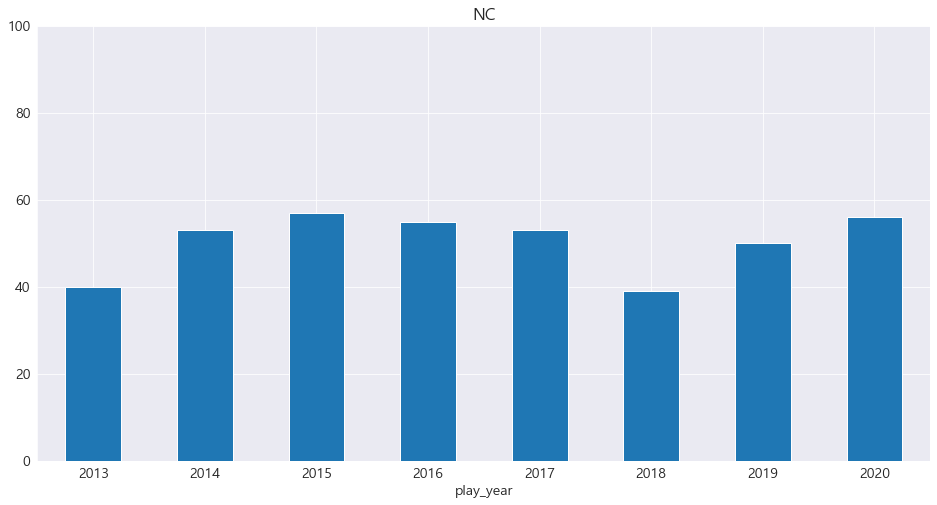

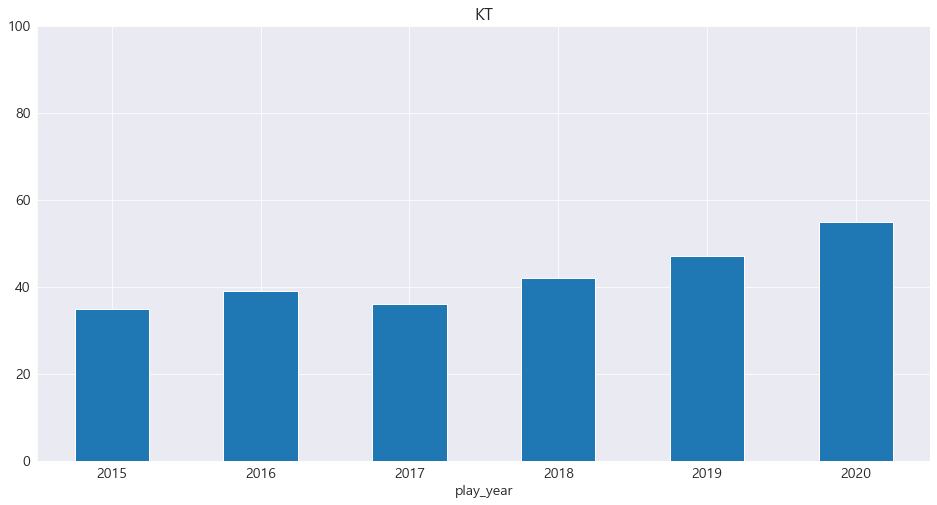

In [48]:
# 팀의 수 만큼 반복한다.
for team_name in team_list:
    # 현재 팀 데이터를 추출한다.
    idx = df5.query('team1 == @team_name').index
    df6 = df5.loc[idx]
    # display(df6)
    
    # 현재 팀의 경기년도를 기준으로 승리 횟수를 구한다.
    a1 = df6.groupby('play_year')['result'].sum()
    # 현재 팀의 경기년도를 기준으로 승리 횟수를 구한다.
    a2 = df6.groupby('play_year')['result'].count()
    # 승률을 구한다.
    a3 = (a1/a2*100).astype('int')
    # display(a3)
    
    # 시각화한다.
    a3.plot.bar(rot=0)
    plt.title(team_name)
    plt.ylim(0,100)
    plt.show()
    

### 각 팀별 상대 팀에 대한 승률

In [49]:
df4

,play_date,team1,team2,score1,score2,result
0,20080329,롯데,한화,11,1,1
1,20080329,LG,SK,4,5,0
2,20080329,KIA,삼성,3,4,0
3,20080329,롯데,한화,11,1,1
4,20080329,LG,SK,4,5,0
...,...,...,...,...,...,...
17493,20201118,NC,두산,4,5,0
17494,20201120,두산,NC,7,6,1
17495,20201121,두산,NC,0,3,0
17496,20201123,NC,두산,5,0,1


In [50]:
# 필요한 데이터만 추출한다.
df5 = df4[['team1', 'team2', 'result']]
df5

,team1,team2,result
0,롯데,한화,1
1,LG,SK,0
2,KIA,삼성,0
3,롯데,한화,1
4,LG,SK,0
...,...,...,...
17493,NC,두산,0
17494,두산,NC,1
17495,두산,NC,0
17496,NC,두산,1


In [53]:
# team1을 기준으로 그룹을 묶고 그 안에서 team2를 기준으로 그룹
a1 = df5.groupby(['team1', 'team2'])['result'].sum()
a2 = df5.groupby(['team1', 'team2'])['result'].count()

# 승률을 계산한다.
a3 = (a1 / a2 * 100).astype('int')
a3

team1  team2
KIA    KT       52
       LG       48
       NC       46
       SK       47
       넥센_키움    47
                ..
한화     SK       34
       넥센_키움    46
       두산       39
       롯데       39
       삼성       39
Name: result, Length: 90, dtype: int32

In [54]:
# 전체 팀의 이름을 가져온다.
team_list = df4['team1'].value_counts().index
team_list

Index(['두산', 'SK', '넥센_키움', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT'], dtype='object')

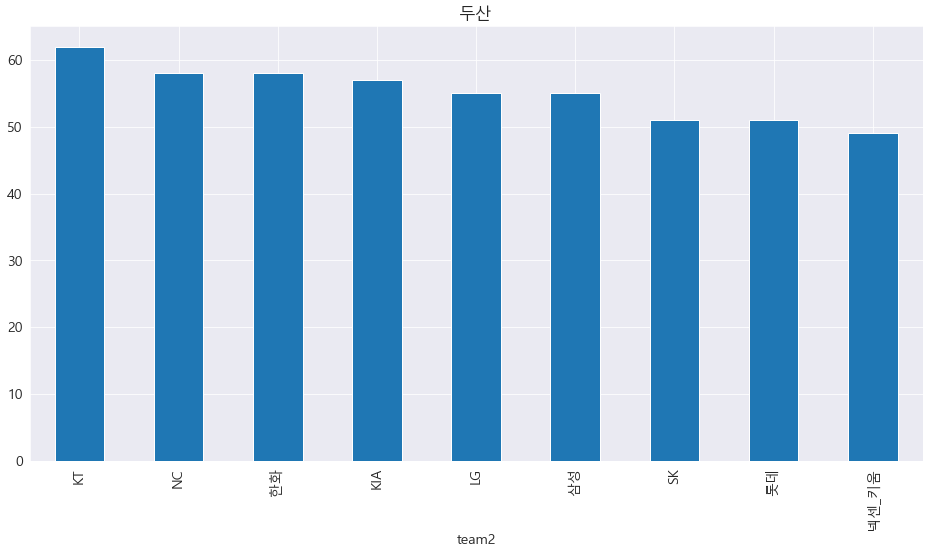

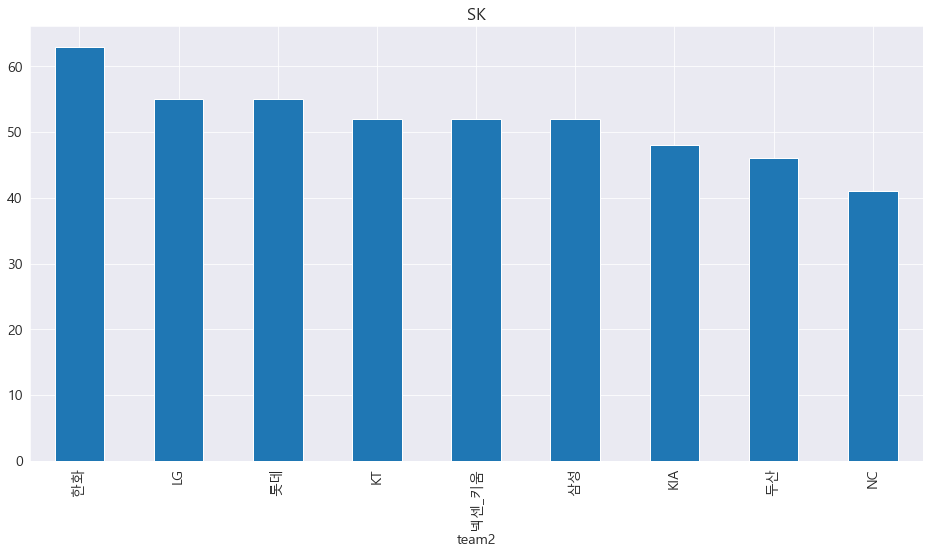

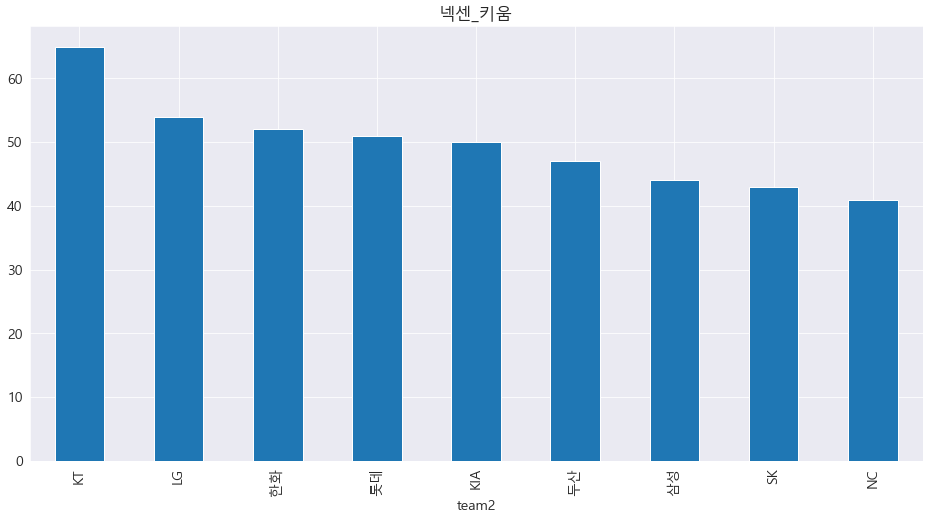

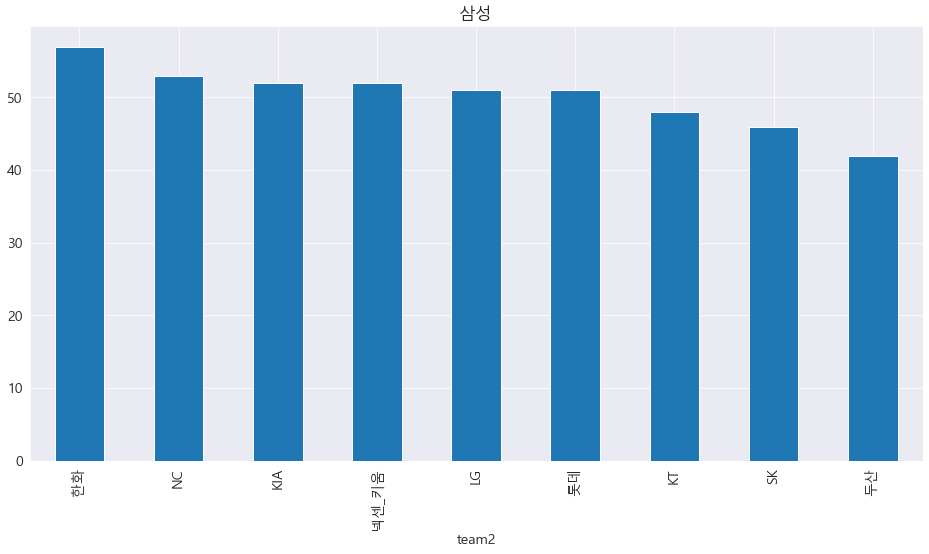

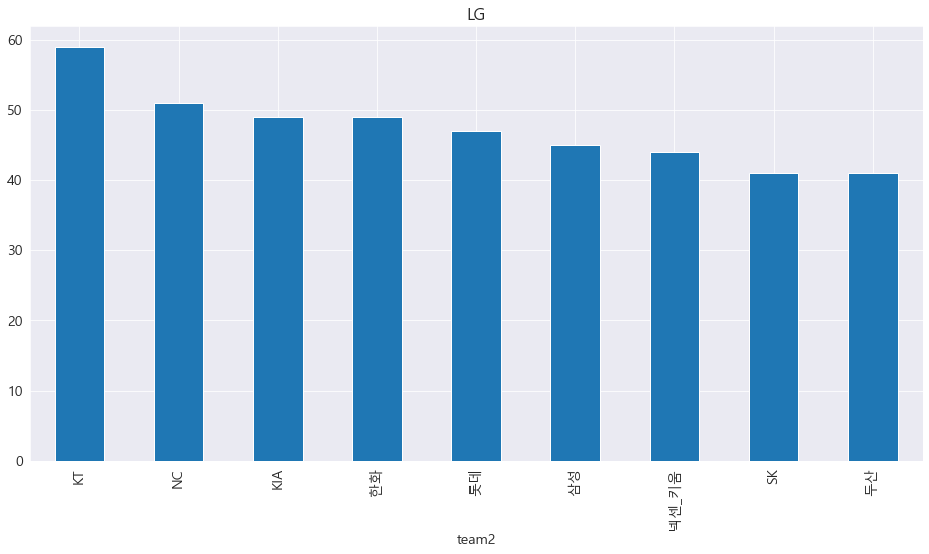

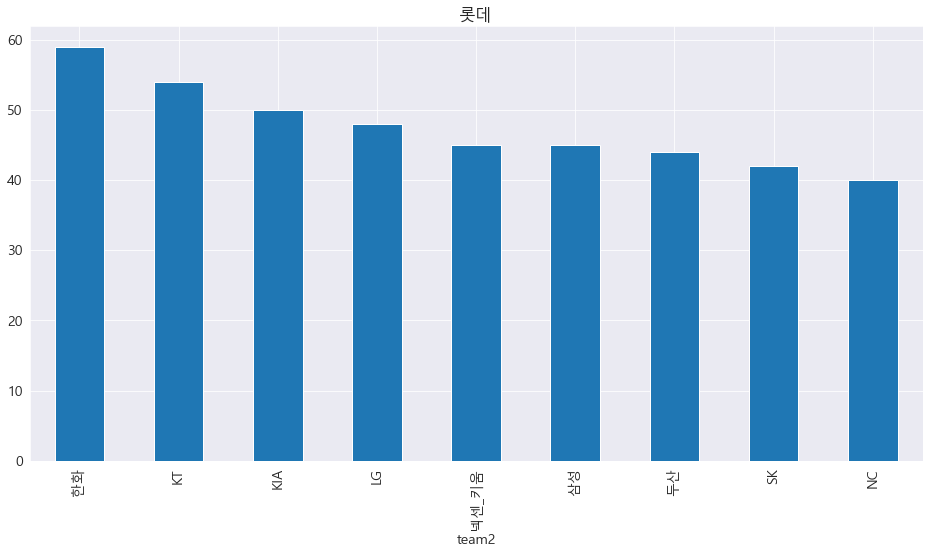

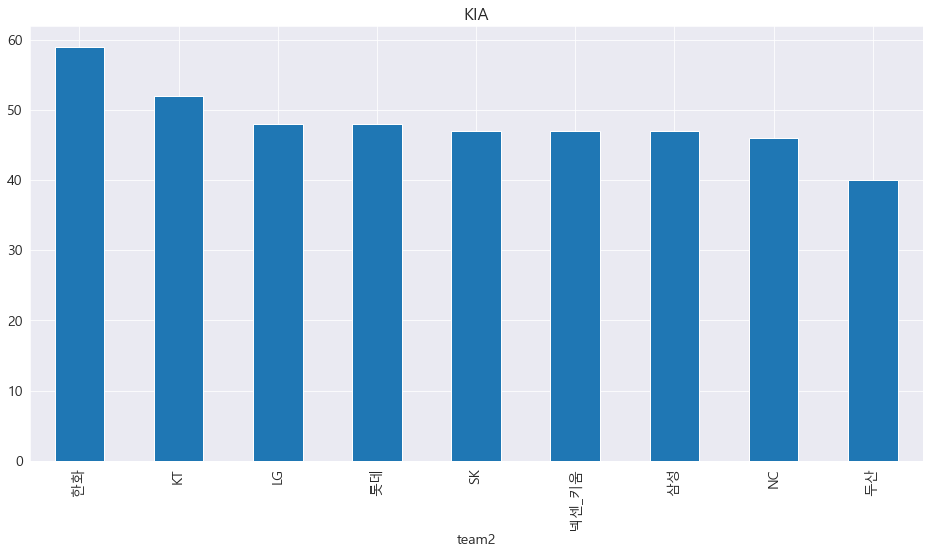

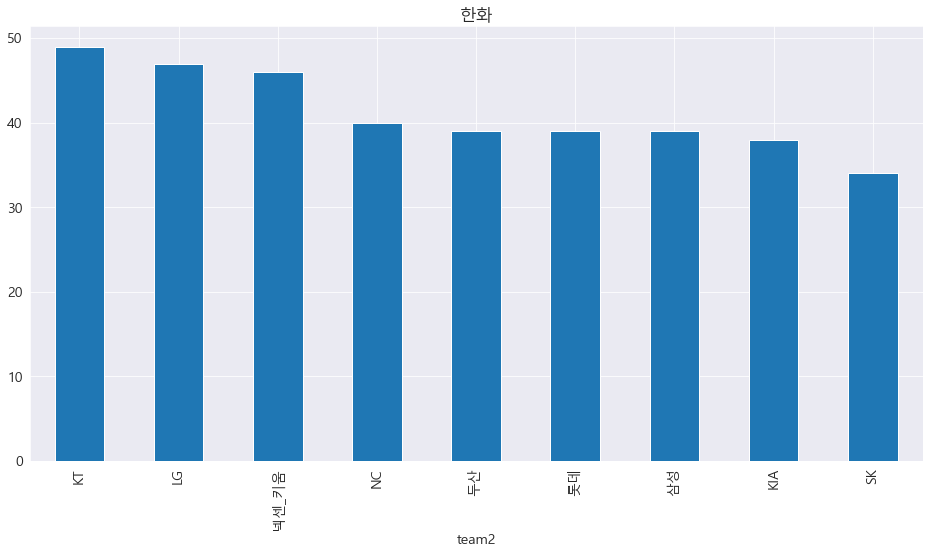

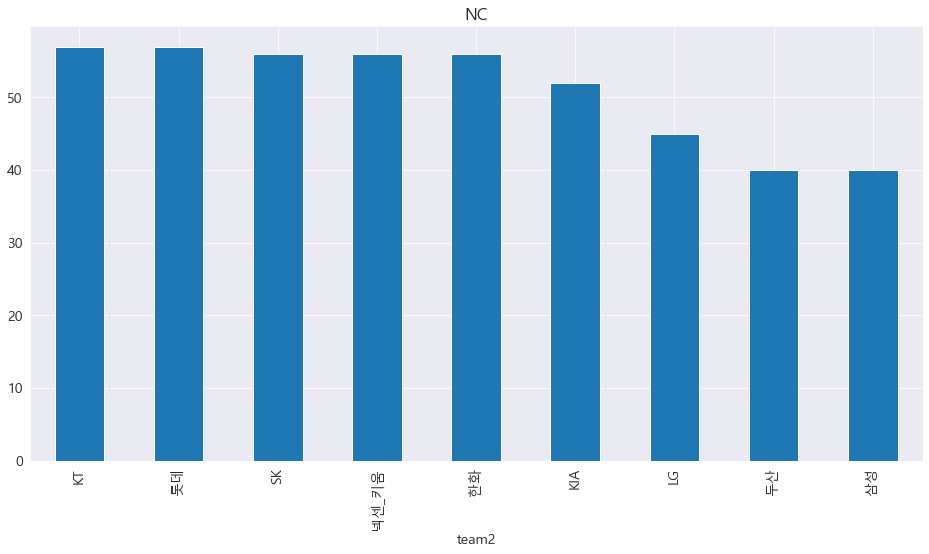

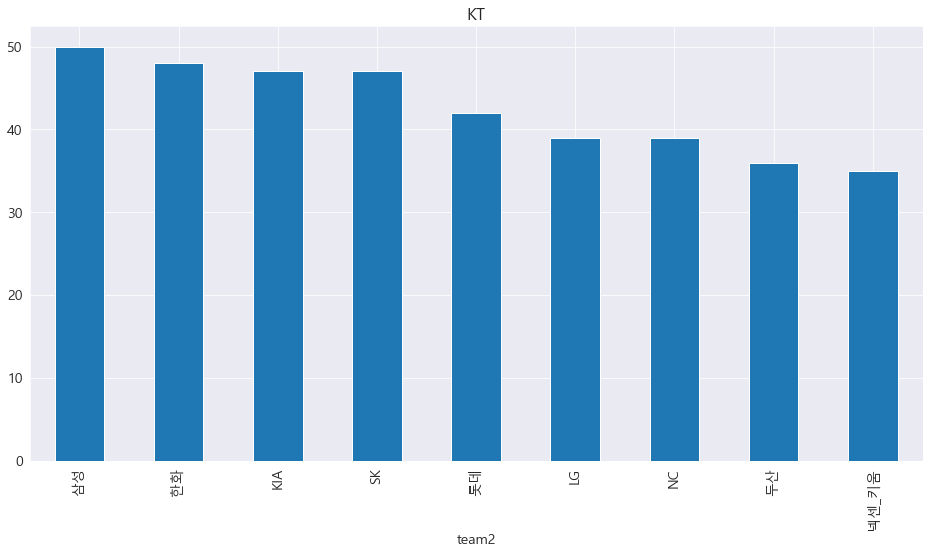

In [57]:
# 팀의 수 만큼 반복한다.
for team_name in team_list:
    # 현재 팀의 승률을 정렬한다.
    a4 = a3[team_name].sort_values(ascending=False)
    
    a4.plot.bar()
    plt.title(team_name)
    plt.show()

,동네북
한화,7
KT,7
LG,4
KIA,4
NC,3
롯데,2
SK,1
넥센_키움,1
삼성,1
두산,0


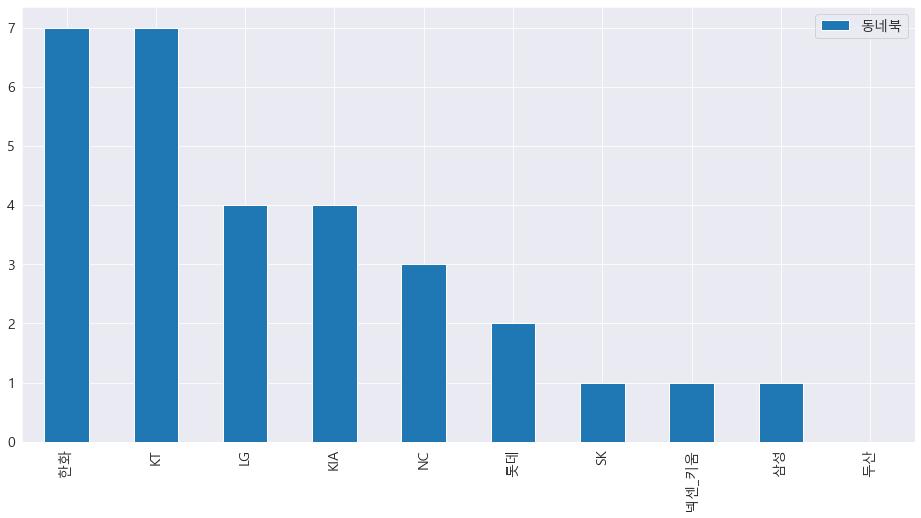

동네북은 한화와 KT입니다.


In [68]:
# 각 팀의 승률이 높은 3개의 팀을 추출해서 여기에 몇 번 포함되는지를 확인한다.
data_dict = {}

# 딕셔너리에 팀 이름으로 0을 저장한다.
for team_name in team_list:
    data_dict[team_name] = 0
    
# display(data_dict)

# 팀 이름만큼 반복한다.
for team_name in team_list:
    # 현재 팀의 승률을 정렬한다.
    a4 = a3[team_name].sort_values(ascending=False)
    # 상위 3개 팀의 이름을 가져온다.
    a5 = a4.head(3).index
    # print(a5)
    
    # 딗셔너리에 있는 값을 증가시킨다.
    for a6 in a5 :
        data_dict[a6] = data_dict[a6] + 1
# print(data_dict)

# 데이터프레임 생성
a1 = data_dict.keys()
a2 = data_dict.values()
result_df = pd.DataFrame(list(a2), index=a1, columns=['동네북'])
result_df.sort_values(by='동네북', inplace=True, ascending=False)
display(result_df)

result_df.plot.bar()
plt.show()
print('동네북은 한화와 KT입니다.')